In [1]:
import numpy
# scipy.special for the sigmoid function expit()
import scipy.special
# for plotting arrays
import matplotlib.pyplot
# plots inside the notebook, not external window
%matplotlib inline

In [2]:
# range -0.5 to +0.5
numpy.random.rand(3, 3) - 0.5

array([[-0.25656574, -0.22104215, -0.29683096],
       [-0.2874893 ,  0.40854315, -0.13334873],
       [-0.25787087,  0.28462157,  0.24476336]])

In [3]:
# class definition
class neuralNetwork:
    # initialise the neural network
    def __init__(self, inputnodes, hiddennodes, outputnodes, learningrate):
        # set number of nodes in each input, hidden, output layer
        self.inodes = inputnodes
        self.hnodes = hiddennodes
        self.onodes = outputnodes
        
        # learning rate
        self.lr = learningrate
        
        # link weight matrices, wih and who
        # weights inside the arrays are w_i_j, where link is from node
        # i to node j in the next layer
        # w11 w21
        # w12 w22 etc
        # self.wih = (numpy.random.rand(self.hnodes, self.inodes) - 0.5)
        # self.who = (numpy.random.rand(self.onodes, self.hnodes) - 0.5)
        self.wih = numpy.random.normal(0.0, pow(self.inodes, -0.5), (self.hnodes, self.inodes))
        self.who = numpy.random.normal(0.0, pow(self.hnodes, -0.5), (self.onodes, self.hnodes))
        
        # activation function is the sigmoid function
        self.activation_function = lambda x: scipy.special.expit(x)
        pass
    
    # train the neural network
    def train(self, inputs_list, targets_list):
        # convert inputs list to 2d array
        inputs = numpy.array(inputs_list, ndmin=2).T
        targets = numpy.array(targets_list, ndmin=2).T
        
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        
        # error is the (target - actual)
        output_errors = targets - final_outputs
        
        # hidden layer error is the output_errors, split by weights, 
        # recombined at hidden nodes
        hidden_errors = numpy.dot(self.who.T, output_errors)
        
        # update the weights for the links between the hidden and output layers
        self.who += self.lr * numpy.dot((output_errors * final_outputs * (1.0 - final_outputs)), 
            numpy.transpose(hidden_outputs))
        
        # update the weights for the links between the input and hidden layers
        self.wih += self.lr * numpy.dot((hidden_errors * hidden_outputs * (1.0 - hidden_outputs)), 
            numpy.transpose(inputs))
        
        pass
    
    # query the neural network
    def query(self, inputs_list):
        # convert inputs list to 2d arrays
        inputs = numpy.array(inputs_list, ndmin=2).T
        
        # for the hidden layer
        # -----------------------------
        # calculate signals into hidden layer
        hidden_inputs = numpy.dot(self.wih, inputs)
        # calculate the signals emerging from hidden layer
        hidden_outputs = self.activation_function(hidden_inputs)
        # -----------------------------
        
        # for the final output layer
        # -----------------------------
        # calculate signals into final output layer
        final_inputs = numpy.dot(self.who, hidden_outputs)
        # calculate the signals emerging from final output layer
        final_outputs = self.activation_function(final_inputs)
        # -----------------------------
        
        return final_outputs

In [4]:
# number of input, hidden and output nodes
input_nodes = 784
hidden_nodes = 200
output_nodes = 10

# learning rate is 0.3
learning_rate = 0.1

# create instance of neural network
n = neuralNetwork(input_nodes, hidden_nodes, output_nodes, learning_rate)

In [5]:
# n.query([1.0, 0.5, -1.5])

In [6]:
# load the mnist training data CSV file into a list
training_data_file = open("mnist_dataset/mnist_train.csv", 'r')
training_data_list = training_data_file.readlines()
training_data_file.close()

In [7]:
# train the neural network

# epoch is the number of times the training data set is used for 
# training
epoch = 5

for e in range(epoch):
# go through all records in the training data set
    for record in training_data_list:
        # split the record by the ',' commas
        all_values = record.split(',')
        # scale and shift the inputs
        inputs = (numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01
        # create the target output values (all 0.01, except the desired
        # label which is 0.99)
        targets = numpy.zeros(output_nodes) + 0.01
        # all_values[0] is the target label for this record
        targets[int(all_values[0])] = 0.99
        n.train(inputs, targets)
        pass
pass




In [8]:
# load the mnist test data CSV file into a list
test_data_file = open("mnist_dataset/mnist_test.csv", 'r')
test_data_list = test_data_file.readlines()
test_data_file.close()

In [9]:
# get the first test record
all_values = test_data_list[0].split(',')
# print the label
print(all_values[0])

7


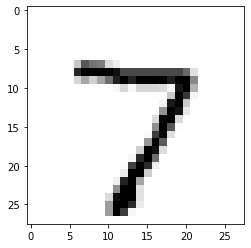

In [10]:
image_array = numpy.asfarray(all_values[1:]).reshape((28, 28))
matplotlib.pyplot.imshow(image_array, cmap='Greys', interpolation='None')

In [11]:
n.query((numpy.asfarray(all_values[1:])/255.0 * 0.99) + 0.01)

array([[2.56861016e-02],
       [2.19905299e-02],
       [6.51019126e-03],
       [3.39692073e-03],
       [9.48323333e-03],
       [1.40680112e-02],
       [1.53321428e-02],
       [9.96346714e-01],
       [6.74161839e-04],
       [6.16730190e-04]])

In [12]:
# test the neural network
# scorecard for how well the network performs, initially empty
scorecard = []

In [13]:
# go through all the records in the test data set
for record in test_data_list:
    # split the record by the ',' commas
    all_values = record.split(',')
    # correct answer is first value
    correct_label = int(all_values[0])
    # print(correct_label, "correct label")
    # scale and  shift the inputs
    inputs = (numpy.asfarray(all_values[1:]) / 255.0 * 0.99) + 0.01
    # query the network
    outputs = n.query(inputs)
    # the index of the highest value corresponds to the label
    label = numpy.argmax(outputs)
    #print(label, "network's answer")
    # append correct or incorrect to list
    if (label == correct_label):
        # networks' answer matches correct answer, add 1 to 
        # scorecard
        scorecard.append(1)
    else:
        # network's answer doesn't match correct answer, add 0 to 
        # scorecard
        scorecard.append(0)
        pass

In [14]:
# print(scorecard)

In [15]:
# calculate the performance score, the fraction of correct answers
scorecard_array = numpy.asarray(scorecard)
print("performance = ", scorecard_array.sum() / 
    scorecard_array.size)

performance =  0.9729
